Installing dependencies and setup


In [1]:
%pip install tensorflow tensorflow-gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\User\AppData\Local\Temp\pip-install-l75zmz4v\tensorflow-gpu_b512faa42a094044a8e8b26abc0d70ed\setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
ERROR: Could not build


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached python_version-0.0.2-py2.py3-none-any.whl (3.4 kB)
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu


In [2]:
!pip list


Package                      Version
---------------------------- ------------
absl-py                      2.0.0
asttokens                    2.4.0
astunparse                   1.6.3
backcall                     0.2.0
beautifulsoup4               4.12.2
cachetools                   5.3.2
certifi                      2023.11.17
charset-normalizer           3.3.2
click                        8.1.7
colorama                     0.4.6
coloredlogs                  15.0.1
comm                         0.1.4
contourpy                    1.1.1
cycler                       0.12.1
debugpy                      1.8.0
decorator                    5.1.1
et-xmlfile                   1.1.0
executing                    1.2.0
flatbuffers                  23.5.26
fonttools                    4.43.1
gast                         0.5.4
google-auth                  2.23.4
google-auth-oauthlib         1.1.0
google-pasta                 0.2.0
grpcio                       1.59.3
h5py                         3.10

In [3]:
import tensorflow as tf 
import os

In [ ]:
os.path.join('data','happy')

'data\\happy'

In [ ]:
gpus=tf.config.experimental.list_physical_devices("CPU")

In [ ]:
len(gpus)

1

In [ ]:
#limiting the gpu use if you have any to avoid OOM
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

Data Cleaning


In [ ]:
import cv2
import imghdr
from matplotlib import pyplot as plt

C:\Users\User\AppData\Local\Temp\ipykernel_9884\3427753027.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [ ]:
data_dir='data'

In [ ]:
Image_exts=['jpeg','jpg','bmp','png']

In [ ]:
os.listdir(data_dir)

['Happy', 'Sad']

In [ ]:
os.listdir(os.path.join(data_dir,'happy'))#happy imaage directory

['05-12-21-happy-people.jpg',
 '1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg',
 '13ryLrJDyVF05wXDYYUXcJQ.jpeg',
 '170404-happy-workers-feature.jpg',
 '1920px-face-smile.svg_.png',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '1zgJ8mDXVYwNY_5KkZr9Wzw.jpeg',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 '2016-01-04-1451880335-5503640-thedailyhabitsofsupremelyhappypeople.jpg',
 '343515-worldhappinessreport1440.jpg',
 '35438_hd.jpg',
 '360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg',
 '7-principles-of-successful-and-happy-people.png',
 '7VR73K6EP5ETVEOUFANWBUYJEQ.jpg',
 '81BduzygJPL._AC_UF10001000_QL80_.jpg',
 '89ca5d41335b4f9207b9cf03538a7dbd63497e474912837562cb9f58809ac32f.png',
 '8e06de1bf2171da2312b6de61c61e4bc.jpg',
 '960x0.jpg',
 '9b65a25adca61c48bcb01370116723e3.jpg',
 'A_Sep20_14_1189155141.jpg',
 'business-people-succesful-celebrating-group-successful-39416686-800x500.jpg',
 'compassion-900x387.jpg',
 'es_27x40_pre_final_en-us_cps_custom-c5a0cc5b

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):#this allows us to get the path of the images class
        image_path=os.path.join(data_dir,image_class,image)#this allows us to get the path of each and every images 
        try:
            img=cv2.imread(image_path)#imread allows to open that imags
            tip=imghdr.what(image_path)
            if tip not in Image_exts:
                print("Image no tin ext list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with images {}".format(image_path))

In [ ]:
happy_image_1=cv2.imread(os.path.join('data','happy','smile.woman_.jpg'))#helps to read our imagaes in numpy array 

In [ ]:
happy_image_1.shape #gives the result in the form of row column and channel

(3844, 5125, 3)

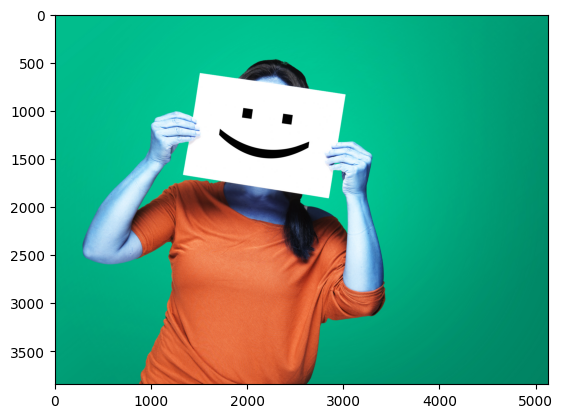

In [ ]:
plt.imshow(happy_image_1) #wierd color because opencv use bgr

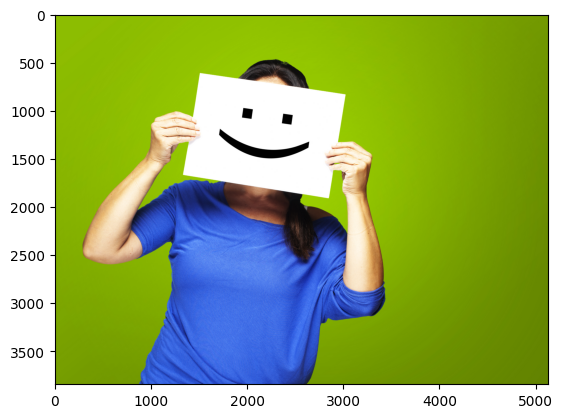

In [ ]:
plt.imshow(cv2.cvtColor(happy_image_1,cv2.COLOR_BGR2RGB))

plt.show()

In [ ]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None) -> 'DatasetV2'>

In [ ]:
import numpy as np 

In [ ]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [ ]:
data=tf.keras.utils.image_dataset_from_directory('data') #this will direcilty create a dataset also apply bunch of data preprocessing to it

Found 168 files belonging to 2 classes.


The issue with this method of dataset cration is that we cannot directly assess the dataset by using data[0] so we need to first create a data iterator


In [ ]:
data_iterator=data.as_numpy_iterator()

In [ ]:
batch=data_iterator.next()

In [ ]:
batch[0]#allowing us to access a batch 

array([[[[252.       , 231.       , 166.       ],
         [252.       , 231.       , 166.       ],
         [252.70898  , 231.70898  , 166.70898  ],
         ...,
         [252.       , 232.       , 169.       ],
         [251.       , 231.       , 170.       ],
         [251.       , 231.       , 170.       ]],

        [[251.12695  , 230.12695  , 165.12695  ],
         [251.12695  , 230.12695  , 165.12695  ],
         [252.7461   , 231.7461   , 166.7461   ],
         ...,
         [250.2539   , 231.12695  , 165.50781  ],
         [251.87305  , 231.87305  , 170.87305  ],
         [250.52255  , 230.52255  , 169.52255  ]],

        [[253.       , 232.       , 167.       ],
         [253.       , 232.       , 167.       ],
         [251.54492  , 230.54492  , 165.54492  ],
         ...,
         [250.       , 231.       , 165.       ],
         [252.       , 232.       , 171.       ],
         [250.45312  , 230.45312  , 169.45312  ]],

        ...,

        [[214.79575  , 223.79575  , 22

In [ ]:
batch[0].shape #the pipeline code that is keras.utlis.image_dataset_from_direcotry create as bunch of batch size of 32 and images are resize to the size of 256 by 256 with 3 rgb channel

(32, 256, 256, 3)

to override the default batch size we can pass use the following code
tf.keras.utils.images_dataset_from_directory('data',batch_size=16)
as well as other images processing


len 2 represent the first one being numpy representaion of our images
2 represent label


In [ ]:
len(batch)

2

In [ ]:
batch[1] #these represents the labels

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1])

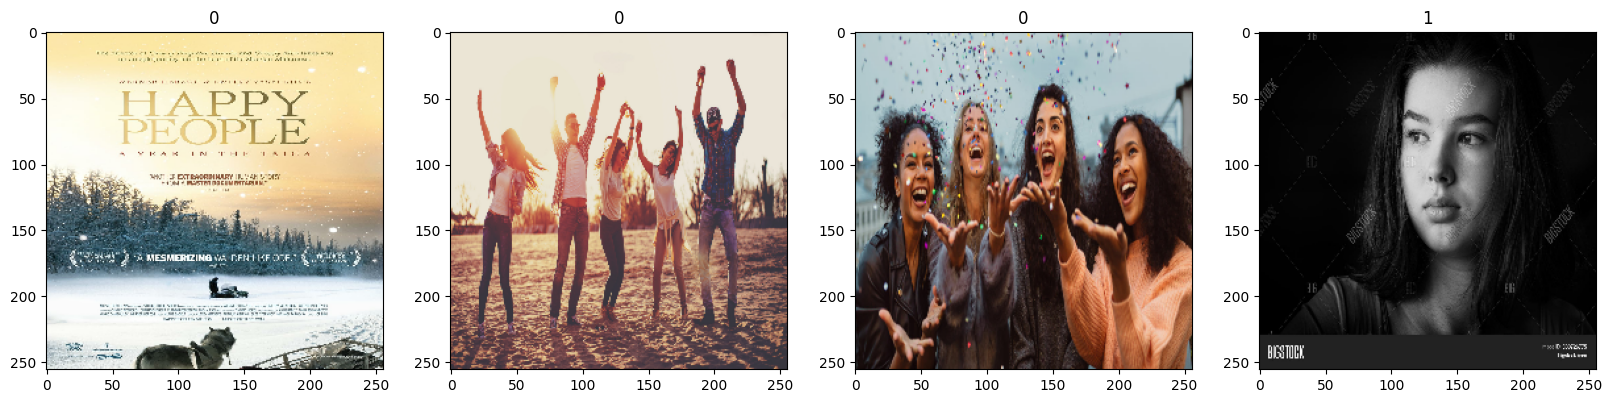

In [ ]:
fig, ax =plt.subplots(ncols=4, figsize=(20,20))
for i,img in enumerate(batch[0][:4]):
    ax[i].imshow(img.astype(int))
    ax[i].title.set_text(batch[1][i])

Data preprocesing
Scalling the images values to 0 and 1
splitting to train test and validation


In [ ]:
batch[0].shape

(32, 256, 256, 3)

In [ ]:
batch[0].max()

255.0

In [ ]:
#scaled=batch[0]/255 this can be done but is not efficent we want to do is use the data pipleling to normalize the data_batch everytime it is loaded into the dataset

Scale data


In [ ]:
data=data.map(lambda x,y:(x/255,y))

In [ ]:
scaled_iterator=data.as_numpy_iterator()


In [ ]:
batch=scaled_iterator.next()

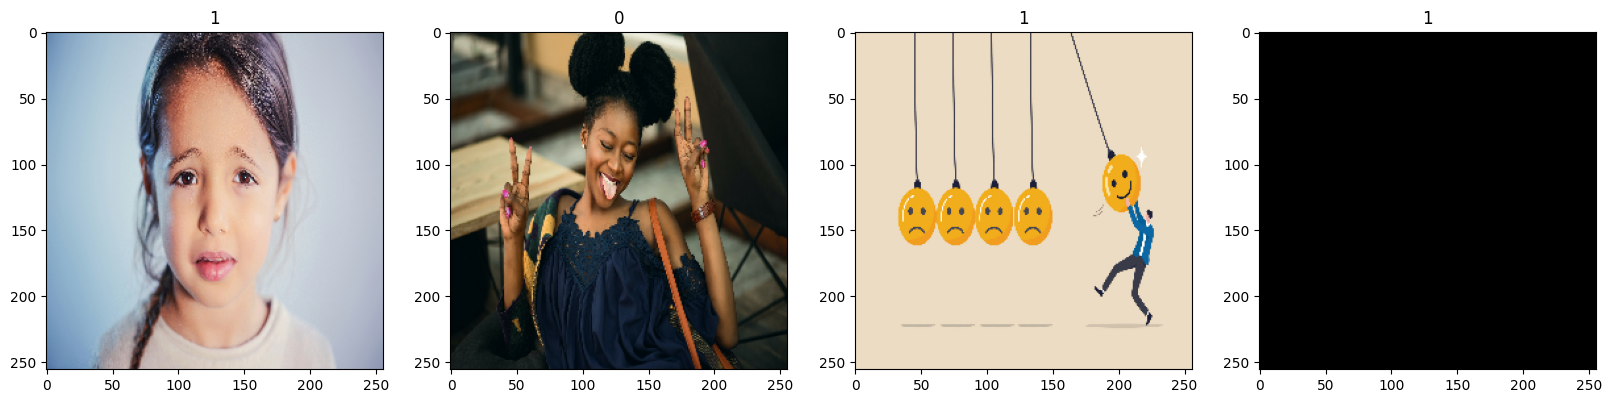

In [ ]:
fig, ax =plt.subplots(ncols=4, figsize=(20,20))
for i,img in enumerate(batch[0][:4]):
    ax[i].imshow(img) #using int provides us black images only 
    ax[i].title.set_text(batch[1][i])

In [ ]:
len(data) #checking the number of batch 

6

In [ ]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)+1#adding +1 to test_size so that it can have 1 batch

In [ ]:
val_size

1

In [ ]:
test_size

1

In [ ]:
train_size

4

In [ ]:
train=data.take(train_size)#allocating the number of batch to training
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [ ]:
len(train)

4

Building learning model


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [ ]:
model=Sequential()

In [ ]:
#filters,kernals,stride
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

Training the model


In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
history=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20


4/4 [==============================] - 12s 2s/step - loss: 1.0693 - accuracy: 0.5000 - val_loss: 0.8441 - val_accuracy: 0.4062
Epoch 2/20
4/4 [==============================] - 9s 2s/step - loss: 0.7358 - accuracy: 0.4766 - val_loss: 0.6867 - val_accuracy: 0.6250
Epoch 3/20
4/4 [==============================] - 9s 2s/step - loss: 0.6582 - accuracy: 0.5469 - val_loss: 0.5884 - val_accuracy: 0.8125
Epoch 4/20
4/4 [==============================] - 8s 2s/step - loss: 0.5859 - accuracy: 0.6953 - val_loss: 0.4919 - val_accuracy: 0.8750
Epoch 5/20
4/4 [==============================] - 9s 2s/step - loss: 0.5127 - accuracy: 0.7812 - val_loss: 0.6003 - val_accuracy: 0.6562
Epoch 6/20
4/4 [==============================] - 8s 2s/step - loss: 0.4834 - accuracy: 0.7891 - val_loss: 0.5698 - val_accuracy: 0.6875
Epoch 7/20
4/4 [==============================] - 10s 2s/step - loss: 0.4628 - accuracy: 0.7969 - val_loss: 0.4583 - val_accuracy: 0.7812
Epoch 8/20
4/4 [=====================

Plotting performance of our model


In [ ]:
history.history

{'loss': [1.0692795515060425,
  0.735826849937439,
  0.6582029461860657,
  0.5859171152114868,
  0.5126785635948181,
  0.483371764421463,
  0.46282249689102173,
  0.3580440878868103,
  0.3614586591720581,
  0.27395233511924744,
  0.2041129171848297,
  0.1688675880432129,
  0.17625559866428375,
  0.10724449902772903,
  0.08729397505521774,
  0.04795064777135849,
  0.027668509632349014,
  0.023874251171946526,
  0.020864561200141907,
  0.01060930173844099],
 'accuracy': [0.5,
  0.4765625,
  0.546875,
  0.6953125,
  0.78125,
  0.7890625,
  0.796875,
  0.859375,
  0.890625,
  0.9375,
  0.9453125,
  0.953125,
  0.953125,
  0.96875,
  0.984375,
  0.9921875,
  1.0,
  0.9921875,
  0.9921875,
  1.0],
 'val_loss': [0.8440893888473511,
  0.6867262125015259,
  0.5884208083152771,
  0.491926908493042,
  0.6002836227416992,
  0.5697543025016785,
  0.4583195149898529,
  0.21515557169914246,
  0.37579405307769775,
  0.1468380242586136,
  0.21712154150009155,
  0.06047029048204422,
  0.1826259940862655

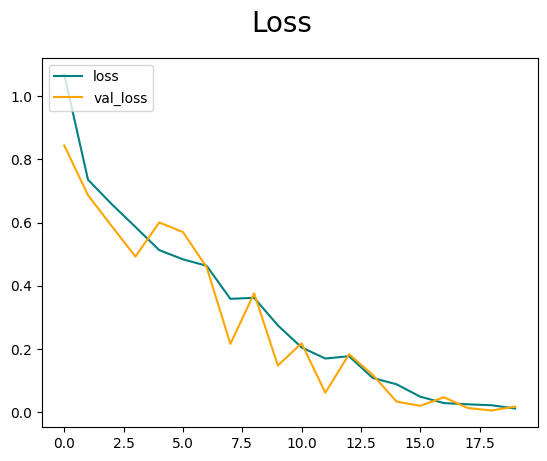

In [ ]:
fig=plt.figure()
plt.plot(history.history['loss'],color='teal',label='loss')
plt.plot(history.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

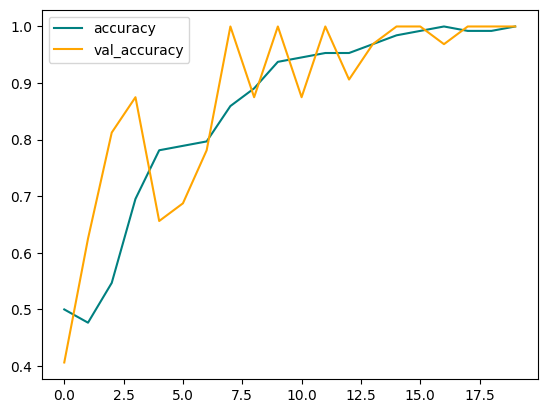

In [ ]:
plt.plot(history.history['accuracy'],color='teal',label='accuracy')
plt.plot(history.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=30)
plt.legend(loc="upper left")
plt.show()

Evaluate our model


In [ ]:
#Evalute
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
#these are the metrics generally used for classification problem